# CatBoost Analysis

## Setup

In [64]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

%matplotlib inline

In [65]:
# Load data
data = pd.read_csv('data/ames_cat.csv')

In [66]:
# Create the independent variables and the target
predictors = data.drop('SalePrice', axis=1)
target = data['SalePrice']

In [67]:
# Check columns
print(predictors.columns)

Index(['GrLivArea', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoS

In [68]:
# Check info
predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Data columns (total 72 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GrLivArea        2576 non-null   int64  
 1   MSSubClass       2576 non-null   int64  
 2   MSZoning         2576 non-null   object 
 3   LotFrontage      2576 non-null   float64
 4   LotArea          2576 non-null   int64  
 5   LotShape         2576 non-null   object 
 6   LandContour      2576 non-null   object 
 7   LotConfig        2576 non-null   object 
 8   LandSlope        2576 non-null   object 
 9   Neighborhood     2576 non-null   object 
 10  Condition1       2576 non-null   object 
 11  BldgType         2576 non-null   object 
 12  HouseStyle       2576 non-null   object 
 13  OverallQual      2576 non-null   int64  
 14  OverallCond      2576 non-null   int64  
 15  RoofStyle        2576 non-null   object 
 16  Exterior1st      2576 non-null   object 
 17  Exterior2nd   

In [69]:
# View data
predictors.head(10)

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Remod,YrSoldLessBuilt,YrSoldLessRemod,Crisis
0,856,30,RL,0.0,7890,Reg,Lvl,Corner,Gtl,SWISU,...,0,0,3,2010,WD,Normal,1,71,60,1
1,1049,120,RL,42.0,4235,Reg,Lvl,Inside,Gtl,Edwards,...,0,0,2,2009,WD,Normal,0,25,25,1
2,1001,30,C (all),60.0,6060,Reg,Lvl,Inside,Gtl,IDOTRR,...,0,0,11,2007,WD,Normal,1,77,0,1
3,1039,70,RL,80.0,8146,Reg,Lvl,Corner,Gtl,OldTown,...,0,0,5,2009,WD,Normal,1,109,6,1
4,1665,60,RL,70.0,8400,Reg,Lvl,Inside,Gtl,NWAmes,...,0,0,11,2009,WD,Normal,0,8,8,1
5,1922,85,RL,64.0,7301,Reg,Lvl,Corner,Gtl,Edwards,...,0,0,7,2009,ConLD,Normal,0,6,6,1
6,936,20,RM,60.0,6000,Reg,Bnk,Inside,Mod,OldTown,...,0,0,2,2009,WD,Normal,0,56,56,1
7,1246,20,RL,53.0,3710,Reg,Lvl,Inside,Gtl,Blmngtn,...,0,0,3,2008,New,Partial,1,1,0,1
8,889,20,RL,74.0,12395,Reg,Lvl,Corner,Gtl,Mitchel,...,0,0,4,2008,WD,Normal,0,24,24,1
9,1072,180,RM,35.0,3675,Reg,Lvl,Inside,Gtl,Edwards,...,0,0,5,2007,WD,Normal,0,2,2,0


## Perform Train-Test Split

In [70]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, random_state=0, test_size = 0.2)

In [71]:
# Check training set features and target
print(X_train.shape)
print(y_train.shape)

(2060, 72)
(2060,)


In [72]:
# Check test set features and target
print(X_test.shape)
print(y_test.shape)

(516, 72)
(516,)


## Train Model

In [74]:
nominative_categoricals = X_train.select_dtypes(include=['object']).columns.tolist()
print(len(nominative_categoricals))

32


In [75]:
# Define the parameter grid for the learning rate and depth
param_grid = {
    'learning_rate': [0.03, 0.1, 0.3],
    'depth': [4, 6, 10]
}

# Initialize a Pool object
train_pool = Pool(X_train, y_train, cat_features=nominative_categoricals)

# Initialize empty dictionary to store results
cv_results = {}

# Loop over all combinations of hyperparameters
for learning_rate in param_grid['learning_rate']:
    for depth in param_grid['depth']:
        
        # Define the parameters for the model
        params = {
            'loss_function': 'RMSE',
            'iterations': 100, 
            'learning_rate': learning_rate,
            'depth': depth
        }

        # Perform cross-validation and store the results
        cv_data = cv(train_pool, params, fold_count=5, plot=False)
        cv_results[(learning_rate, depth)] = np.min(cv_data['test-RMSE-mean'])

# Print the best parameters and RMSE
best_params = min(cv_results, key=cv_results.get)
print(f'Best parameters: learning_rate={best_params[0]}, depth={best_params[1]}')
print(f'Best RMSE: {cv_results[best_params]}')


Training on fold [0/5]
0:	learn: 187722.3113160	test: 178543.1310068	best: 178543.1310068 (0)	total: 4.95ms	remaining: 491ms
1:	learn: 182680.0094318	test: 173585.4909531	best: 173585.4909531 (1)	total: 9.62ms	remaining: 472ms
2:	learn: 177822.5587531	test: 168775.9460483	best: 168775.9460483 (2)	total: 15.5ms	remaining: 502ms
3:	learn: 173017.5845386	test: 164094.8297913	best: 164094.8297913 (3)	total: 20.9ms	remaining: 501ms
4:	learn: 168604.5002955	test: 159688.9679359	best: 159688.9679359 (4)	total: 25ms	remaining: 475ms
5:	learn: 164006.5183761	test: 155273.1367951	best: 155273.1367951 (5)	total: 31ms	remaining: 485ms
6:	learn: 159554.1269003	test: 150838.8595260	best: 150838.8595260 (6)	total: 34.9ms	remaining: 463ms
7:	learn: 155444.5690771	test: 146806.3036345	best: 146806.3036345 (7)	total: 37.9ms	remaining: 435ms
8:	learn: 151265.5855225	test: 142637.9955574	best: 142637.9955574 (8)	total: 39.2ms	remaining: 397ms
9:	learn: 147226.9100033	test: 138682.4281507	best: 138682.4281

## Evaluate Model

In [76]:
cb_best = CatBoostRegressor(iterations=100,
                            depth=best_params[1],
                            learning_rate=best_params[0],
                            loss_function='RMSE',
                            cat_features=nominative_categoricals
                            )

In [77]:
cb_best.fit(X_train, y_train)

0:	learn: 58862.4526294	total: 3.55ms	remaining: 352ms
1:	learn: 48614.1108973	total: 6.19ms	remaining: 303ms
2:	learn: 41408.8200770	total: 8.2ms	remaining: 265ms
3:	learn: 35922.5323538	total: 10.4ms	remaining: 249ms
4:	learn: 32761.7204835	total: 11.9ms	remaining: 226ms
5:	learn: 29965.1102756	total: 13.4ms	remaining: 210ms
6:	learn: 27709.6065436	total: 15.5ms	remaining: 206ms
7:	learn: 26062.3750475	total: 17ms	remaining: 196ms
8:	learn: 24931.6518626	total: 18.5ms	remaining: 188ms
9:	learn: 23908.7314644	total: 20.2ms	remaining: 181ms
10:	learn: 23427.4555051	total: 21.8ms	remaining: 177ms
11:	learn: 22788.5544723	total: 23.4ms	remaining: 172ms
12:	learn: 22204.8316686	total: 25ms	remaining: 167ms
13:	learn: 21723.7073027	total: 27.3ms	remaining: 167ms
14:	learn: 21247.4493183	total: 28.7ms	remaining: 162ms
15:	learn: 20897.6376114	total: 30.3ms	remaining: 159ms
16:	learn: 20566.9006602	total: 33.8ms	remaining: 165ms
17:	learn: 20271.1713388	total: 35.4ms	remaining: 161ms
18:	lea

In [78]:
# Predict on the train set
y_pred_train = cb_best.predict(X_train)

# Compute the R^2 score
r2_train = r2_score(y_train, y_pred_train)
print(f"R^2 Score: {r2_train}")

R^2 Score: 0.9675264115530232


In [79]:
# Predict on the test set
y_pred_test = cb_best.predict(X_test)

# Compute the R^2 score
r2_test = r2_score(y_test, y_pred_test)
print(f"R^2 Score: {r2_test}")

R^2 Score: 0.9356781932197483


## Feature Importances

In [34]:
feature_importances = cb_best.get_feature_importance(prettified=True)
print(feature_importances)

     Feature Id  Importances
0     GrLivArea    19.255260
1   OverallQual    18.794239
2   TotalBsmtSF    10.038362
3     ExterQual     9.659737
4    GarageArea     7.103835
..          ...          ...
75        Fence     0.000000
76  MiscFeature     0.000000
77      MiscVal     0.000000
78       YrSold     0.000000
79     SaleType     0.000000

[80 rows x 2 columns]


In [80]:
# Print Top 5 features
print(feature_importances.head(5))

    Feature Id  Importances
0    GrLivArea    19.255260
1  OverallQual    18.794239
2  TotalBsmtSF    10.038362
3    ExterQual     9.659737
4   GarageArea     7.103835


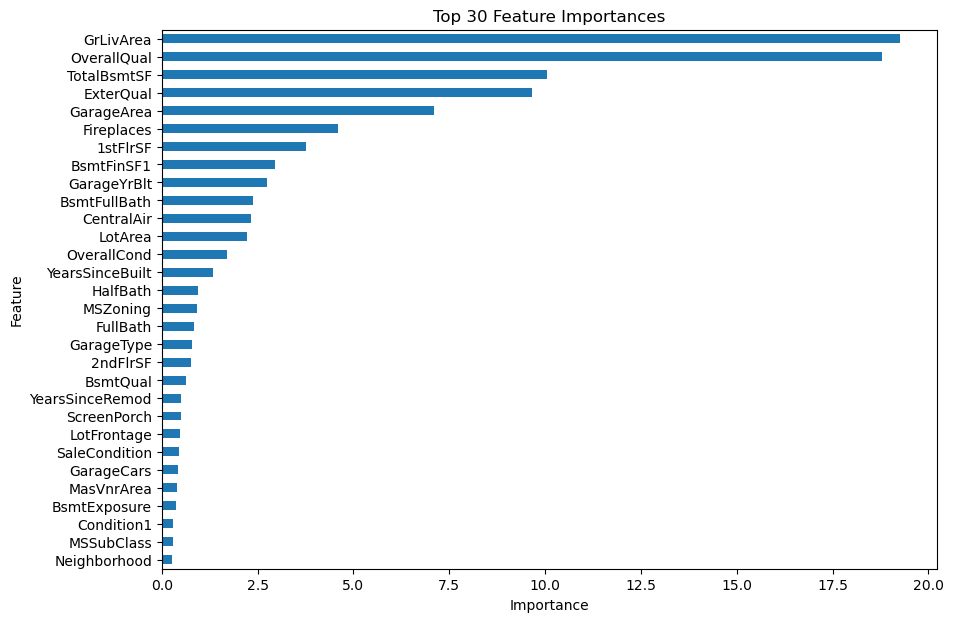

In [90]:
# Select the top 30 features
feature_importances_top_30 = feature_importances.head(30)

# Plot the bar chart
feature_importances_top_30.set_index('Feature Id')['Importances'].sort_values().plot(kind='barh', figsize=(10,7))
plt.title("Top 30 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")

# Show the plot
plt.show()
